# Data Cleaning: ข้อมูลฝนเชิงพื้นที่ประเทศไทย
## สำหรับการแสดงผลบน Looker Studio

Notebook นี้ใช้สำหรับทำความสะอาดข้อมูลฝน (spatial-rain-hii.csv) เพื่อเตรียมข้อมูลสำหรับการสร้าง visualization บน Looker Studio

**ข้อมูล:**
- ไฟล์: spatial-rain-hii.csv
- ประกอบด้วย: ข้อมูลปริมาณฝนรายเดือนของแต่ละจังหวัดในประเทศไทย
- คอลัมน์: YEAR, MONTH, PROV_ID, PROV_T, MinRain, MaxRain, AvgRain

## 0. Install Required Libraries
ติดตั้ง Python packages ที่จำเป็นสำหรับการทำงาน (รันครั้งแรกเท่านั้น)

In [25]:
# ติดตั้ง packages ที่จำเป็น (uncomment บรรทัดด้านล่างและรันครั้งเดียว)
%pip install pandas numpy matplotlib seaborn scikit-learn

# หรือถ้าต้องการระบุเวอร์ชัน
# !pip install pandas==2.1.4 numpy==1.26.2 matplotlib==3.8.2 seaborn==0.13.0

print("📦 Required packages:")
print("  - pandas (data manipulation)")
print("  - numpy (numerical operations)")
print("  - matplotlib (visualization)")
print("  - seaborn (advanced visualization)")
print("\n💡 Uncomment the pip install line above and run once to install all packages.")

Note: you may need to restart the kernel to use updated packages.
📦 Required packages:
  - pandas (data manipulation)
  - numpy (numerical operations)
  - matplotlib (visualization)
  - seaborn (advanced visualization)

💡 Uncomment the pip install line above and run once to install all packages.


## 1. Import Required Libraries
นำเข้า libraries ที่จำเป็นสำหรับการทำความสะอาดและวิเคราะห์ข้อมูล

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ตั้งค่าการแสดงผล
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load Data from CSV
โหลดข้อมูลจากไฟล์ spatial-rain-hii.csv

In [27]:
# โหลดข้อมูล
df = pd.read_csv('datasets/spatial-rain-hii.csv')

print(f"✓ Data loaded successfully")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

✓ Data loaded successfully
Shape: 7,161 rows × 7 columns


## 3. Explore Data Structure
สำรวจโครงสร้างข้อมูลเบื้องต้น

In [28]:
# แสดงข้อมูลเบื้องต้น
print("=== Dataset Overview ===\n")
print(df.head(10))
print("\n" + "="*50)
print("\n=== Data Info ===")
print(df.info())
print("\n=== Column Names ===")
print(df.columns.tolist())

=== Dataset Overview ===

   YEAR  MONTH  PROV_ID           PROV_T    MinRain     MaxRain     AvgRain
0  2018      1       10    กรุงเทพมหานคร  54.299999  257.230011  142.119137
1  2018      1       11      สมุทรปราการ  76.250000  256.100006  137.302046
2  2018      1       12          นนทบุรี  38.360001  161.470001  113.433771
3  2018      1       13         ปทุมธานี  51.439999  116.500000   82.901688
4  2018      1       14  พระนครศรีอยุธยา   8.850000   88.589996   39.960089
5  2018      1       15          อ่างทอง   4.390000   33.939999   20.627357
6  2018      1       16           ลพบุรี   6.520000   99.489998   49.085258
7  2018      1       17        สิงห์บุรี   4.000000   35.639999   17.033646
8  2018      1       18           ชัยนาท   0.100000   12.830000    6.312983
9  2018      1       19          สระบุรี  23.850000   73.070000   47.685371


=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7161 entries, 0 to 7160
Data columns (total 7 columns):
 #   Column 

In [29]:
# สถิติเชิงพรรณนา
print("=== Descriptive Statistics ===\n")
print(df.describe())
print("\n=== Data Types ===\n")
print(df.dtypes)

=== Descriptive Statistics ===

              YEAR        MONTH      PROV_ID      MinRain      MaxRain  \
count  7161.000000  7161.000000  7161.000000  7161.000000  7161.000000   
mean   2021.387097     6.354839    51.129870    87.130672   193.031782   
std       2.238782     3.406889    24.943935    99.945572   190.820737   
min    2018.000000     1.000000    10.000000     0.000000     0.000000   
25%    2019.000000     3.000000    31.000000     5.000000    38.000000   
50%    2021.000000     6.000000    50.000000    57.970001   155.699997   
75%    2023.000000     9.000000    72.000000   137.910000   282.649994   
max    2025.000000    12.000000    96.000000  1264.140000  1642.350000   

           AvgRain  
count  7161.000000  
mean    132.093711  
std     133.333766  
min       0.000000  
25%      18.866890  
50%     104.605621  
75%     200.885996  
max    1452.629329  

=== Data Types ===

YEAR         int64
MONTH        int64
PROV_ID      int64
PROV_T      object
MinRain    floa

## 4. Handle Missing Values
ตรวจสอบและจัดการกับค่าที่หายไป

In [30]:
# ตรวจสอบค่าที่หายไป
print("=== Missing Values Analysis ===\n")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percent.values
})
print(missing_df)
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# สร้างสำเนาของข้อมูลก่อนทำความสะอาด
df_original = df.copy()
print(f"\n✓ Created backup of original data")

=== Missing Values Analysis ===

    Column  Missing Count  Percentage
0     YEAR              0         0.0
1    MONTH              0         0.0
2  PROV_ID              0         0.0
3   PROV_T              0         0.0
4  MinRain              0         0.0
5  MaxRain              0         0.0
6  AvgRain              0         0.0

Total missing values: 0

✓ Created backup of original data


In [31]:
# จัดการค่าที่หายไป (ถ้ามี)
if df.isnull().sum().sum() > 0:
    # สำหรับคอลัมน์ตัวเลข ใช้ค่าเฉลี่ย
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    
    # สำหรับคอลัมน์ข้อความ ใช้ค่าที่พบบ่อยที่สุด
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    print("✓ Missing values handled")
else:
    print("✓ No missing values found")

✓ No missing values found


## 5. Check and Remove Duplicates
ตรวจสอบและลบแถวที่ซ้ำกัน

In [32]:
# ตรวจสอบข้อมูลซ้ำ
print("=== Duplicate Check ===\n")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"\nRemoving {duplicates} duplicate rows...")
    df = df.drop_duplicates()
    print(f"✓ Duplicates removed. New shape: {df.shape}")
else:
    print("✓ No duplicates found")

=== Duplicate Check ===

Number of duplicate rows: 0
✓ No duplicates found


## 6. Data Type Conversion
แปลงประเภทข้อมูลให้เหมาะสมสำหรับ Looker Studio

In [33]:
# แปลงประเภทข้อมูล
print("=== Data Type Conversion ===\n")

# ตรวจสอบ data types ก่อนแปลง
print("Before conversion:")
print(df.dtypes)

# แปลง YEAR และ MONTH เป็นตัวเลข
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['MONTH'] = pd.to_numeric(df['MONTH'], errors='coerce')
df['PROV_ID'] = pd.to_numeric(df['PROV_ID'], errors='coerce')

# สร้างคอลัมน์วันที่สำหรับ Looker Studio (ใช้วันที่ 1 ของทุกเดือน)
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str) + '-01', errors='coerce')

# แปลงคอลัมน์ฝนเป็น float
rainfall_columns = ['MinRain', 'MaxRain', 'AvgRain']
for col in rainfall_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ปัดเศษค่าฝนให้มี 2 ตำแหน่งทศนิยม
df[rainfall_columns] = df[rainfall_columns].round(2)

print("\nAfter conversion:")
print(df.dtypes)
print("\n✓ Data types converted successfully")

=== Data Type Conversion ===

Before conversion:
YEAR         int64
MONTH        int64
PROV_ID      int64
PROV_T      object
MinRain    float64
MaxRain    float64
AvgRain    float64
dtype: object

After conversion:
YEAR                int64
MONTH               int64
PROV_ID             int64
PROV_T             object
MinRain           float64
MaxRain           float64
AvgRain           float64
DATE       datetime64[ns]
dtype: object

✓ Data types converted successfully


## 7. Handle Outliers
ตรวจสอบและจัดการ outliers ในข้อมูลฝน

In [34]:
# ตรวจสอบ outliers ด้วย IQR method
print("=== Outlier Detection (IQR Method) ===\n")

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in rainfall_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"{col}:")
    print(f"  Range: [{lower:.2f}, {upper:.2f}]")
    print(f"  Outliers found: {len(outliers)}")
    print(f"  Min: {df[col].min():.2f}, Max: {df[col].max():.2f}")
    print()

print("Note: Outliers are kept in the dataset as they may represent real extreme weather events")
print("✓ Outlier analysis completed")

=== Outlier Detection (IQR Method) ===

MinRain:
  Range: [-194.37, 337.27]
  Outliers found: 157
  Min: 0.00, Max: 1264.14

MaxRain:
  Range: [-328.97, 649.62]
  Outliers found: 226
  Min: 0.00, Max: 1642.35

AvgRain:
  Range: [-254.16, 473.92]
  Outliers found: 179
  Min: 0.00, Max: 1452.63

Note: Outliers are kept in the dataset as they may represent real extreme weather events
✓ Outlier analysis completed


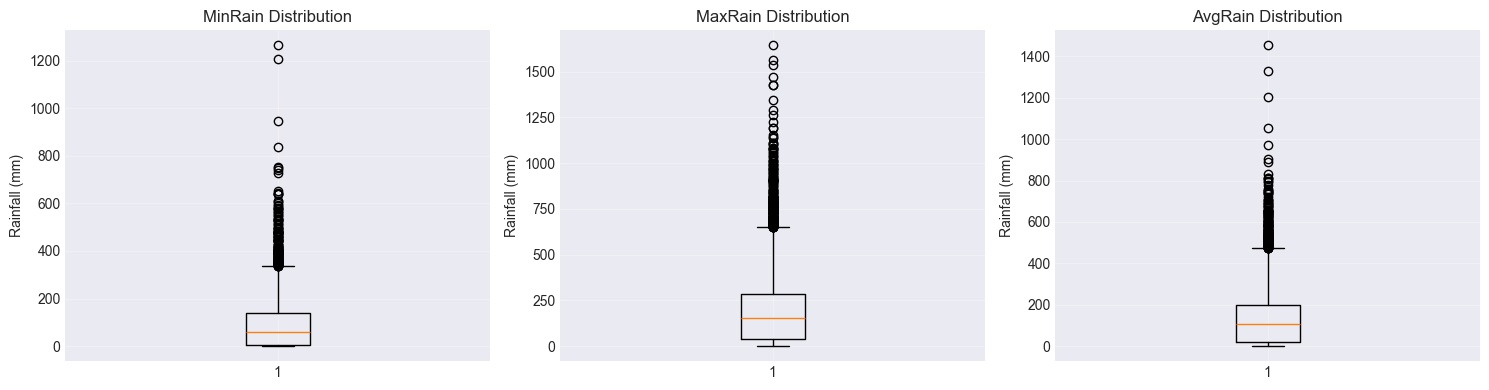

✓ Boxplot visualization created


In [35]:
# สร้าง visualization สำหรับ outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(rainfall_columns):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_ylabel('Rainfall (mm)')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Boxplot visualization created")

## 8. Additional Data Quality Checks
ตรวจสอบคุณภาพข้อมูลเพิ่มเติม

In [36]:
# ตรวจสอบความสมเหตุสมผลของข้อมูล
print("=== Data Quality Checks ===\n")

# 1. ตรวจสอบค่าติดลบ
print("1. Checking for negative rainfall values:")
for col in rainfall_columns:
    negative_count = (df[col] < 0).sum()
    print(f"   {col}: {negative_count} negative values")

# 2. ตรวจสอบความสัมพันธ์ระหว่าง Min, Avg, Max
print("\n2. Checking rainfall relationship (Min ≤ Avg ≤ Max):")
inconsistent = df[(df['MinRain'] > df['AvgRain']) | (df['AvgRain'] > df['MaxRain'])]
print(f"   Inconsistent rows: {len(inconsistent)}")

# 3. ตรวจสอบช่วงปี
print(f"\n3. Year range: {df['YEAR'].min():.0f} - {df['YEAR'].max():.0f}")

# 4. ตรวจสอบจำนวนจังหวัด
print(f"\n4. Number of unique provinces: {df['PROV_T'].nunique()}")

# 5. ตรวจสอบจำนวน records ต่อจังหวัด
print(f"\n5. Records per province:")
province_counts = df.groupby('PROV_T').size().describe()
print(province_counts)

print("\n✓ Data quality checks completed")

=== Data Quality Checks ===

1. Checking for negative rainfall values:
   MinRain: 0 negative values
   MaxRain: 0 negative values
   AvgRain: 0 negative values

2. Checking rainfall relationship (Min ≤ Avg ≤ Max):
   Inconsistent rows: 0

3. Year range: 2018 - 2025

4. Number of unique provinces: 77

5. Records per province:
count    77.0
mean     93.0
std       0.0
min      93.0
25%      93.0
50%      93.0
75%      93.0
max      93.0
dtype: float64

✓ Data quality checks completed


## 9. Final Data Summary
สรุปข้อมูลหลังจากทำความสะอาด

In [37]:
# สรุปข้อมูลหลังการทำความสะอาด
print("="*60)
print("CLEANED DATA SUMMARY")
print("="*60)

print(f"\nOriginal shape: {df_original.shape}")
print(f"Cleaned shape: {df.shape}")
print(f"Rows removed: {df_original.shape[0] - df.shape[0]}")

print(f"\n--- Column Information ---")
print(df.dtypes)

print(f"\n--- Sample of Cleaned Data ---")
print(df.head(10))

print(f"\n--- Missing Values After Cleaning ---")
print(df.isnull().sum())

print(f"\n--- Memory Usage ---")
print(f"Total memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*60)
print("✓ Data cleaning process completed successfully!")
print("="*60)

CLEANED DATA SUMMARY

Original shape: (7161, 7)
Cleaned shape: (7161, 8)
Rows removed: 0

--- Column Information ---
YEAR                int64
MONTH               int64
PROV_ID             int64
PROV_T             object
MinRain           float64
MaxRain           float64
AvgRain           float64
DATE       datetime64[ns]
dtype: object

--- Sample of Cleaned Data ---
   YEAR  MONTH  PROV_ID           PROV_T  MinRain  MaxRain  AvgRain       DATE
0  2018      1       10    กรุงเทพมหานคร    54.30   257.23   142.12 2018-01-01
1  2018      1       11      สมุทรปราการ    76.25   256.10   137.30 2018-01-01
2  2018      1       12          นนทบุรี    38.36   161.47   113.43 2018-01-01
3  2018      1       13         ปทุมธานี    51.44   116.50    82.90 2018-01-01
4  2018      1       14  พระนครศรีอยุธยา     8.85    88.59    39.96 2018-01-01
5  2018      1       15          อ่างทอง     4.39    33.94    20.63 2018-01-01
6  2018      1       16           ลพบุรี     6.52    99.49    49.09 2018-01-

## 10. Export Cleaned Data
ส่งออกข้อมูลที่ทำความสะอาดแล้วเพื่อนำไปใช้กับ Looker Studio

In [38]:
# จัดเรียงคอลัมน์ให้เหมาะสมสำหรับ Looker Studio
columns_order = ['DATE', 'YEAR', 'MONTH', 'PROV_ID', 'PROV_T', 'MinRain', 'MaxRain', 'AvgRain']
df_export = df[columns_order].copy()

# เรียงข้อมูลตามวันที่และจังหวัด
df_export = df_export.sort_values(['DATE', 'PROV_ID'])

# Reset index
df_export = df_export.reset_index(drop=True)

print("=== Export Preview ===")
print(df_export.head(10))
print(f"\nTotal rows to export: {len(df_export):,}")

=== Export Preview ===
        DATE  YEAR  MONTH  PROV_ID           PROV_T  MinRain  MaxRain  AvgRain
0 2018-01-01  2018      1       10    กรุงเทพมหานคร    54.30   257.23   142.12
1 2018-01-01  2018      1       11      สมุทรปราการ    76.25   256.10   137.30
2 2018-01-01  2018      1       12          นนทบุรี    38.36   161.47   113.43
3 2018-01-01  2018      1       13         ปทุมธานี    51.44   116.50    82.90
4 2018-01-01  2018      1       14  พระนครศรีอยุธยา     8.85    88.59    39.96
5 2018-01-01  2018      1       15          อ่างทอง     4.39    33.94    20.63
6 2018-01-01  2018      1       16           ลพบุรี     6.52    99.49    49.09
7 2018-01-01  2018      1       17        สิงห์บุรี     4.00    35.64    17.03
8 2018-01-01  2018      1       18           ชัยนาท     0.10    12.83     6.31
9 2018-01-01  2018      1       19          สระบุรี    23.85    73.07    47.69

Total rows to export: 7,161


In [39]:
# ส่งออกเป็นไฟล์ CSV สำหรับ Looker Studio
output_file = 'output/spatial-rain-hii-cleaned.csv'

try:
    df_export.to_csv(output_file, index=False, encoding='utf-8-sig')
    print(f"✓ Data exported successfully!")
    print(f"File location: {output_file}")
    print(f"\nFile size: {pd.read_csv(output_file).memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"\nYou can now upload this file to Looker Studio for visualization.")
except Exception as e:
    print(f"Error exporting data: {e}")

✓ Data exported successfully!
File location: output/spatial-rain-hii-cleaned.csv

File size: 1.29 MB

You can now upload this file to Looker Studio for visualization.


## 11. Data Visualization Preview
แสดงภาพรวมข้อมูลก่อนนำไปใช้งาน

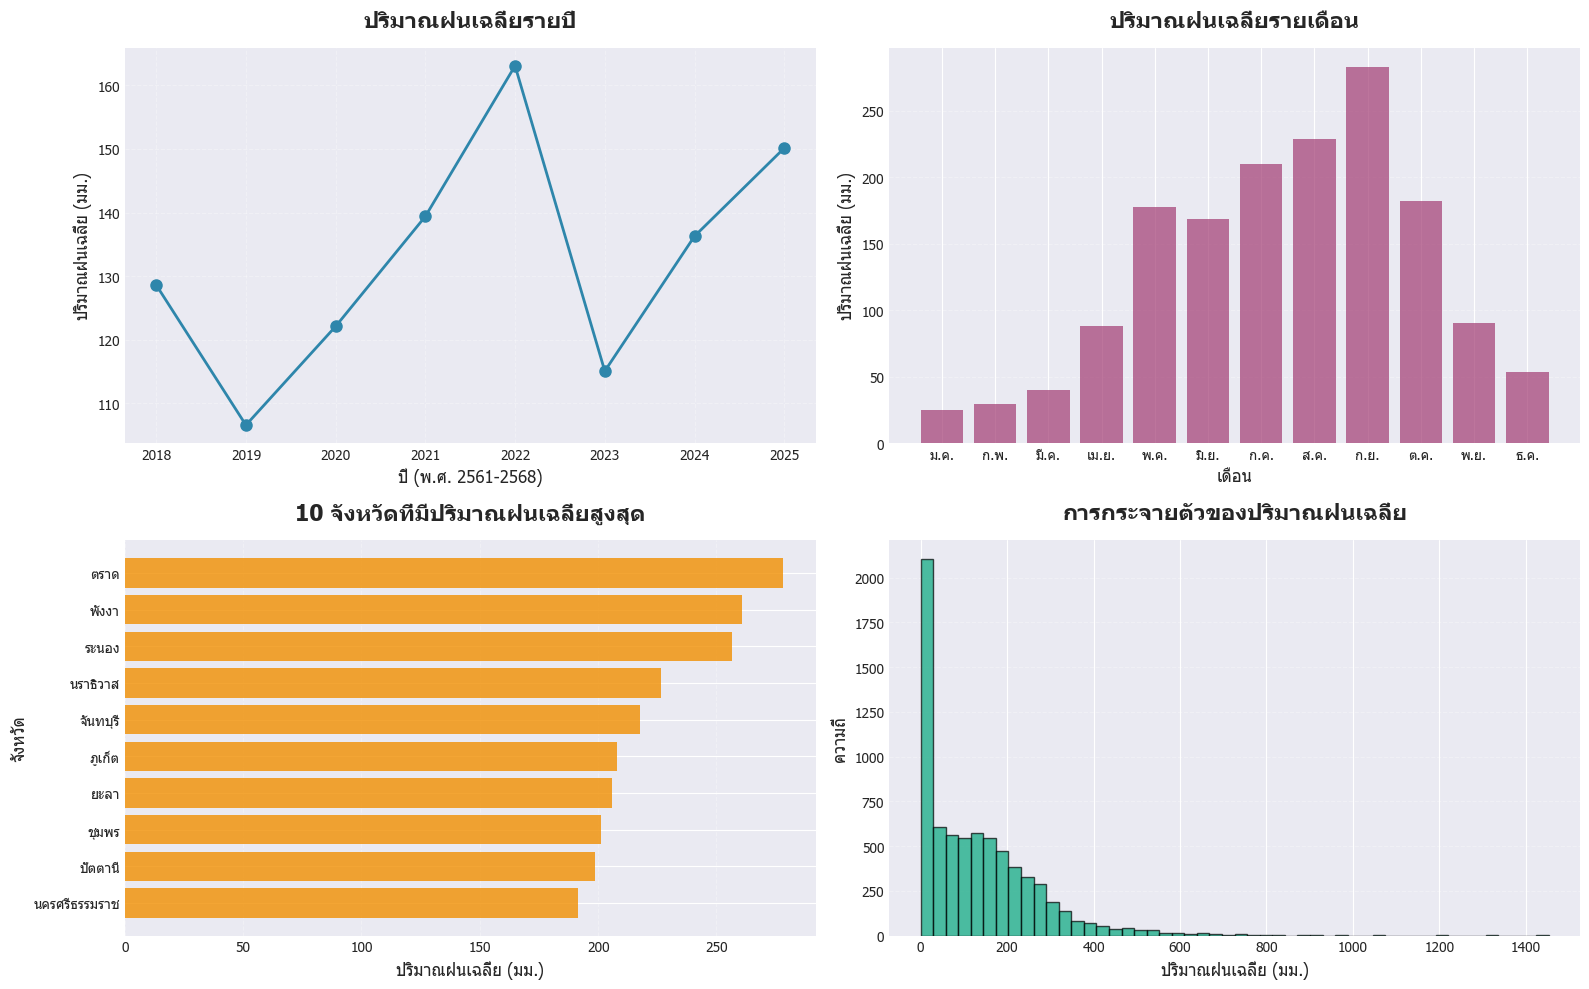

✓ สร้าง Visualization เรียบร้อยแล้ว (รองรับภาษาไทย)


In [40]:
# สร้าง visualization เพื่อดูภาพรวมข้อมูล

# ตั้งค่า font สำหรับภาษาไทย
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans', 'Arial Unicode MS', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False  # แก้ปัญหาเครื่องหมายลบ

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Average rainfall by year
yearly_avg = df_export.groupby('YEAR')['AvgRain'].mean()
axes[0, 0].plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2, markersize=8, color='#2E86AB')
axes[0, 0].set_title('ปริมาณฝนเฉลี่ยรายปี', fontsize=16, fontweight='bold', pad=15)
axes[0, 0].set_xlabel('ปี (พ.ศ. ' + str(int(yearly_avg.index.min() + 543)) + '-' + str(int(yearly_avg.index.max() + 543)) + ')', fontsize=12)
axes[0, 0].set_ylabel('ปริมาณฝนเฉลี่ย (มม.)', fontsize=12)
axes[0, 0].grid(True, alpha=0.3, linestyle='--')

# 2. Average rainfall by month
monthly_avg = df_export.groupby('MONTH')['AvgRain'].mean()
month_names = ['ม.ค.', 'ก.พ.', 'มี.ค.', 'เม.ย.', 'พ.ค.', 'มิ.ย.', 'ก.ค.', 'ส.ค.', 'ก.ย.', 'ต.ค.', 'พ.ย.', 'ธ.ค.']
axes[0, 1].bar(range(len(monthly_avg)), monthly_avg.values, color='#A23B72', alpha=0.7)
axes[0, 1].set_title('ปริมาณฝนเฉลี่ยรายเดือน', fontsize=16, fontweight='bold', pad=15)
axes[0, 1].set_xlabel('เดือน', fontsize=12)
axes[0, 1].set_ylabel('ปริมาณฝนเฉลี่ย (มม.)', fontsize=12)
axes[0, 1].set_xticks(range(len(month_names)))
axes[0, 1].set_xticklabels(month_names, fontsize=10)
axes[0, 1].grid(True, alpha=0.3, axis='y', linestyle='--')

# 3. Top 10 provinces by average rainfall
province_avg = df_export.groupby('PROV_T')['AvgRain'].mean().sort_values(ascending=False).head(10)
axes[1, 0].barh(province_avg.index, province_avg.values, color='#F18F01', alpha=0.8)
axes[1, 0].set_title('10 จังหวัดที่มีปริมาณฝนเฉลี่ยสูงสุด', fontsize=16, fontweight='bold', pad=15)
axes[1, 0].set_xlabel('ปริมาณฝนเฉลี่ย (มม.)', fontsize=12)
axes[1, 0].set_ylabel('จังหวัด', fontsize=12)
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x', linestyle='--')

# 4. Distribution of average rainfall
axes[1, 1].hist(df_export['AvgRain'], bins=50, color='#06A77D', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('การกระจายตัวของปริมาณฝนเฉลี่ย', fontsize=16, fontweight='bold', pad=15)
axes[1, 1].set_xlabel('ปริมาณฝนเฉลี่ย (มม.)', fontsize=12)
axes[1, 1].set_ylabel('ความถี่', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.show()

print("✓ สร้าง Visualization เรียบร้อยแล้ว (รองรับภาษาไทย)")

## 12. Data Quality Assessment & Predictive Modeling
วัดประสิทธิภาพข้อมูลที่ clean แล้วด้วย Machine Learning Models

In [41]:
# นำเข้า libraries สำหรับ machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("✓ Machine learning libraries imported successfully")

✓ Machine learning libraries imported successfully


### 12.1 Data Quality Metrics
ประเมินคุณภาพข้อมูลด้วย statistical metrics

In [42]:
# คำนวณ Data Quality Metrics
print("="*60)
print("DATA QUALITY METRICS")
print("="*60)

# 1. Completeness (ความสมบูรณ์)
completeness = (1 - df_export.isnull().sum().sum() / (df_export.shape[0] * df_export.shape[1])) * 100
print(f"\n1. Completeness Score: {completeness:.2f}%")
print(f"   - Total cells: {df_export.shape[0] * df_export.shape[1]:,}")
print(f"   - Missing cells: {df_export.isnull().sum().sum()}")

# 2. Consistency (ความสอดคล้อง)
consistent_rain = df_export[(df_export['MinRain'] <= df_export['AvgRain']) & 
                            (df_export['AvgRain'] <= df_export['MaxRain'])]
consistency = (len(consistent_rain) / len(df_export)) * 100
print(f"\n2. Consistency Score: {consistency:.2f}%")
print(f"   - Consistent records: {len(consistent_rain):,}/{len(df_export):,}")
print(f"   - Rule: MinRain ≤ AvgRain ≤ MaxRain")

# 3. Validity (ความถูกต้อง)
valid_rain = df_export[(df_export['MinRain'] >= 0) & 
                       (df_export['MaxRain'] >= 0) & 
                       (df_export['AvgRain'] >= 0)]
validity = (len(valid_rain) / len(df_export)) * 100
print(f"\n3. Validity Score: {validity:.2f}%")
print(f"   - Valid records: {len(valid_rain):,}/{len(df_export):,}")
print(f"   - Rule: All rainfall values ≥ 0")

# 4. Uniqueness (ความไม่ซ้ำซ้อน)
unique_records = len(df_export) - df_export.duplicated(subset=['YEAR', 'MONTH', 'PROV_ID']).sum()
uniqueness = (unique_records / len(df_export)) * 100
print(f"\n4. Uniqueness Score: {uniqueness:.2f}%")
print(f"   - Unique records: {unique_records:,}/{len(df_export):,}")

# 5. Overall Data Quality Score
overall_quality = (completeness + consistency + validity + uniqueness) / 4
print(f"\n{'='*60}")
print(f"Overall Data Quality Score: {overall_quality:.2f}%")
print(f"{'='*60}")

# ประเมินคุณภาพ
if overall_quality >= 95:
    quality_grade = "EXCELLENT ⭐⭐⭐⭐⭐"
elif overall_quality >= 85:
    quality_grade = "GOOD ⭐⭐⭐⭐"
elif overall_quality >= 75:
    quality_grade = "FAIR ⭐⭐⭐"
else:
    quality_grade = "NEEDS IMPROVEMENT ⭐⭐"

print(f"\nData Quality Grade: {quality_grade}")

DATA QUALITY METRICS

1. Completeness Score: 100.00%
   - Total cells: 57,288
   - Missing cells: 0

2. Consistency Score: 100.00%
   - Consistent records: 7,161/7,161
   - Rule: MinRain ≤ AvgRain ≤ MaxRain

3. Validity Score: 100.00%
   - Valid records: 7,161/7,161
   - Rule: All rainfall values ≥ 0

4. Uniqueness Score: 100.00%
   - Unique records: 7,161/7,161

Overall Data Quality Score: 100.00%

Data Quality Grade: EXCELLENT ⭐⭐⭐⭐⭐


### 12.2 Prepare Data for Machine Learning
เตรียมข้อมูลสำหรับสร้าง predictive models

In [43]:
# เตรียมข้อมูลสำหรับ ML (ทำนาย AvgRain จาก features อื่นๆ)
print("=== Preparing Data for ML ===\n")

# สร้าง features
df_ml = df_export.copy()

# Features: YEAR, MONTH, PROV_ID, MinRain, MaxRain
# Target: AvgRain
X = df_ml[['YEAR', 'MONTH', 'PROV_ID', 'MinRain', 'MaxRain']].copy()
y = df_ml['AvgRain'].copy()

# ลบแถวที่มี missing values
valid_idx = ~(X.isnull().any(axis=1) | y.isnull())
X = X[valid_idx]
y = y[valid_idx]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures used:")
for col in X.columns:
    print(f"  - {col}")
print(f"\nTarget: AvgRain (ปริมาณฝนเฉลี่ย)")

# แบ่งข้อมูล train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n--- Train/Test Split ---")
print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Data prepared successfully for modeling")

=== Preparing Data for ML ===

Features shape: (7161, 5)
Target shape: (7161,)

Features used:
  - YEAR
  - MONTH
  - PROV_ID
  - MinRain
  - MaxRain

Target: AvgRain (ปริมาณฝนเฉลี่ย)

--- Train/Test Split ---
Training set: 5,728 samples (80.0%)
Test set: 1,433 samples (20.0%)

✓ Data prepared successfully for modeling


### 12.3 Build & Compare Regression Models
สร้างและเปรียบเทียบ regression models หลายแบบ

In [44]:
# สร้างและเปรียบเทียบ models
print("="*70)
print("REGRESSION MODELS COMPARISON")
print("="*70)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
}

results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    # Train model
    if 'Forest' in name:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    results[name] = {
        'model': model,
        'R² Score': r2,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE (%)': mape,
        'predictions': y_pred
    }
    
    print(f"  R² Score: {r2:.4f}")
    print(f"  MAE: {mae:.2f} mm")
    print(f"  RMSE: {rmse:.2f} mm")
    print(f"  MAPE: {mape:.2f}%")

print("\n" + "="*70)
print("MODEL PERFORMANCE SUMMARY")
print("="*70)

# สร้าง DataFrame เพื่อเปรียบเทียบ
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'R² Score': [results[m]['R² Score'] for m in results.keys()],
    'MAE (mm)': [results[m]['MAE'] for m in results.keys()],
    'RMSE (mm)': [results[m]['RMSE'] for m in results.keys()],
    'MAPE (%)': [results[m]['MAPE (%)'] for m in results.keys()]
})

comparison_df = comparison_df.sort_values('R² Score', ascending=False)
print("\n", comparison_df.to_string(index=False))

# หา best model
best_model_name = comparison_df.iloc[0]['Model']
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   R² Score: {results[best_model_name]['R² Score']:.4f}")
print(f"   (ค่ายิ่งใกล้ 1 แสดงว่าโมเดลทำนายได้ดี)")

print("\n✓ Model training and evaluation completed")

REGRESSION MODELS COMPARISON

--- Training Linear Regression ---
  R² Score: 0.9763
  MAE: 11.63 mm
  RMSE: 20.50 mm
  MAPE: inf%

--- Training Ridge Regression ---
  R² Score: 0.9763
  MAE: 11.64 mm
  RMSE: 20.50 mm
  MAPE: inf%

--- Training Lasso Regression ---
  R² Score: 0.9760
  MAE: 11.87 mm
  RMSE: 20.62 mm
  MAPE: inf%

--- Training Random Forest ---
  R² Score: 0.9780
  MAE: 10.51 mm
  RMSE: 19.71 mm
  MAPE: inf%

MODEL PERFORMANCE SUMMARY

             Model  R² Score  MAE (mm)  RMSE (mm)  MAPE (%)
    Random Forest  0.978042 10.509241  19.710589       inf
Linear Regression  0.976254 11.632739  20.497536       inf
 Ridge Regression  0.976252 11.635220  20.498423       inf
 Lasso Regression  0.975958 11.869983  20.624616       inf

🏆 Best Model: Random Forest
   R² Score: 0.9780
   (ค่ายิ่งใกล้ 1 แสดงว่าโมเดลทำนายได้ดี)

✓ Model training and evaluation completed


### 12.4 Model Performance Visualization
แสดงผลการทำนายของโมเดลเทียบกับค่าจริง

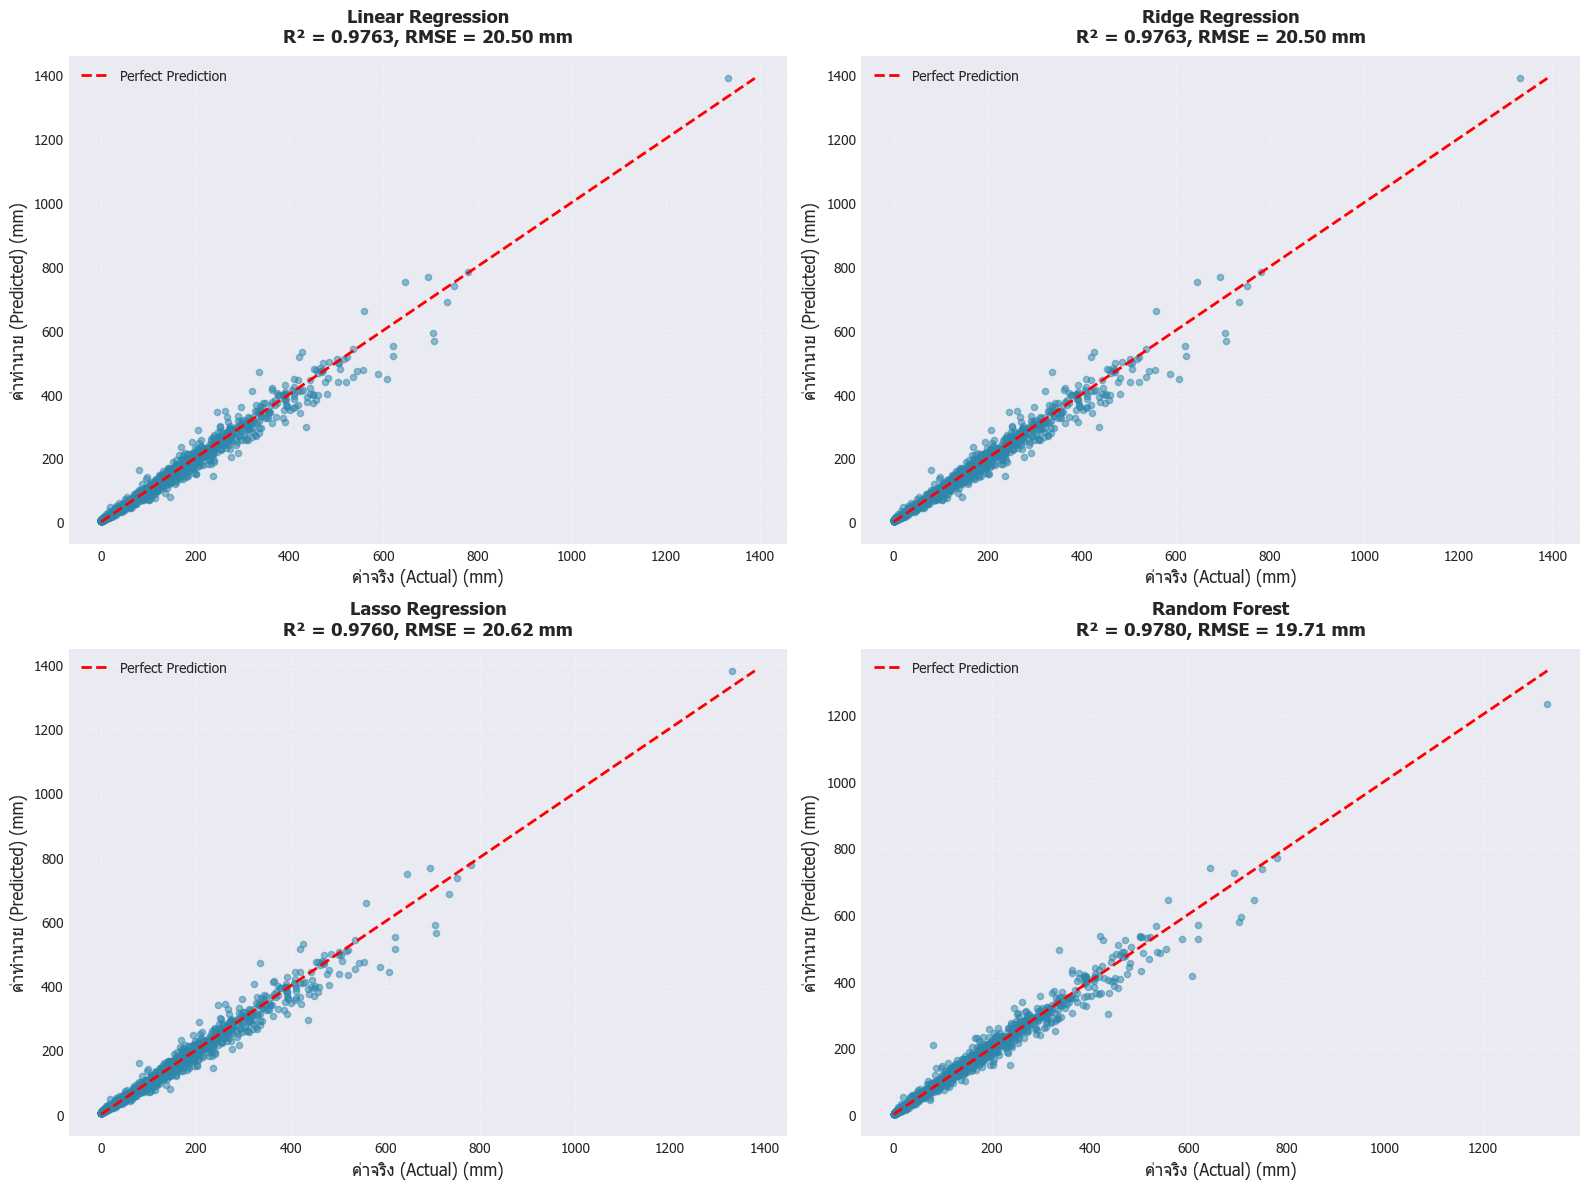

✓ Model performance visualization created


In [45]:
# Visualize model performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot predictions vs actual for each model
for idx, (name, result) in enumerate(results.items()):
    row = idx // 2
    col = idx % 2
    
    y_pred = result['predictions']
    
    # Scatter plot
    axes[row, col].scatter(y_test, y_pred, alpha=0.5, s=20, color='#2E86AB')
    
    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[row, col].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    # Labels and title
    axes[row, col].set_xlabel('ค่าจริง (Actual) (mm)', fontsize=12)
    axes[row, col].set_ylabel('ค่าทำนาย (Predicted) (mm)', fontsize=12)
    axes[row, col].set_title(f'{name}\nR² = {result["R² Score"]:.4f}, RMSE = {result["RMSE"]:.2f} mm', 
                            fontsize=13, fontweight='bold', pad=10)
    axes[row, col].legend(loc='upper left')
    axes[row, col].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("✓ Model performance visualization created")

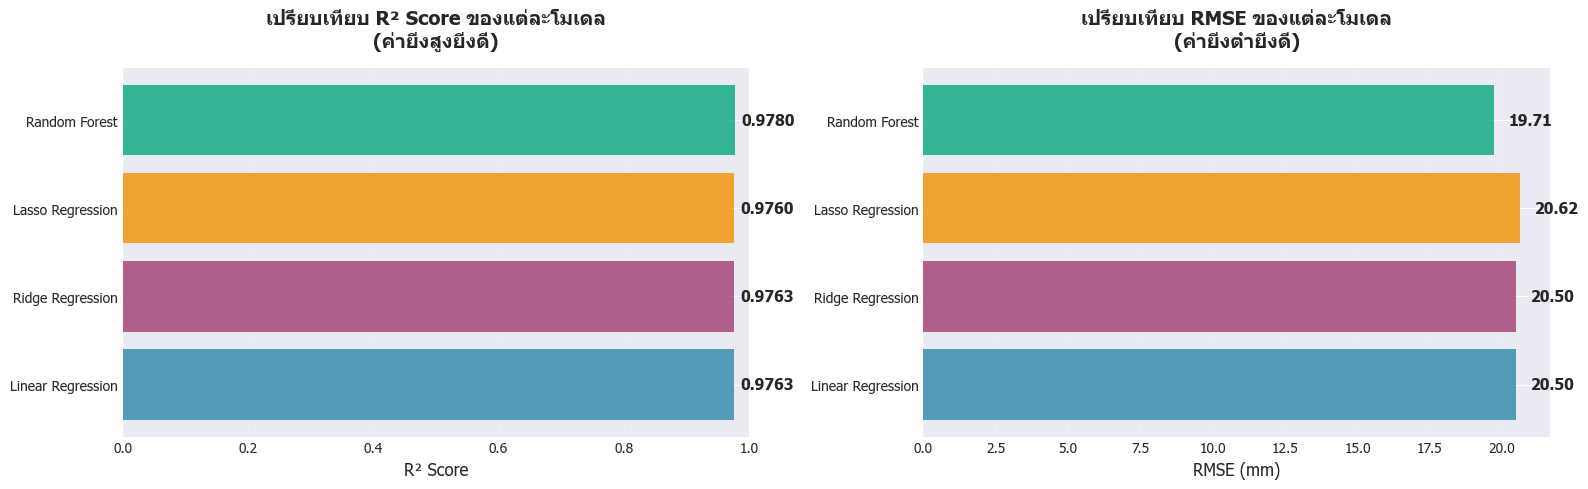

✓ Model comparison visualization created


In [46]:
# เปรียบเทียบ model performance ด้วย bar chart
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# R² Score comparison
model_names = list(results.keys())
r2_scores = [results[m]['R² Score'] for m in model_names]
colors = ['#2E86AB', '#A23B72', '#F18F01', '#06A77D']

axes[0].barh(model_names, r2_scores, color=colors, alpha=0.8)
axes[0].set_xlabel('R² Score', fontsize=12)
axes[0].set_title('เปรียบเทียบ R² Score ของแต่ละโมเดล\n(ค่ายิ่งสูงยิ่งดี)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlim([0, 1])
axes[0].grid(True, alpha=0.3, axis='x', linestyle='--')

# Add value labels
for i, v in enumerate(r2_scores):
    axes[0].text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=11, fontweight='bold')

# RMSE comparison
rmse_scores = [results[m]['RMSE'] for m in model_names]
axes[1].barh(model_names, rmse_scores, color=colors, alpha=0.8)
axes[1].set_xlabel('RMSE (mm)', fontsize=12)
axes[1].set_title('เปรียบเทียบ RMSE ของแต่ละโมเดล\n(ค่ายิ่งต่ำยิ่งดี)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[1].grid(True, alpha=0.3, axis='x', linestyle='--')

# Add value labels
for i, v in enumerate(rmse_scores):
    axes[1].text(v + 0.5, i, f'{v:.2f}', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Model comparison visualization created")

### 12.5 Feature Importance Analysis
วิเคราะห์ว่า features ใดมีความสำคัญต่อการทำนายมากที่สุด

FEATURE IMPORTANCE ANALYSIS (Random Forest)

 Feature  Importance
MaxRain    0.765278
MinRain    0.227725
PROV_ID    0.003708
  MONTH    0.001717
   YEAR    0.001573


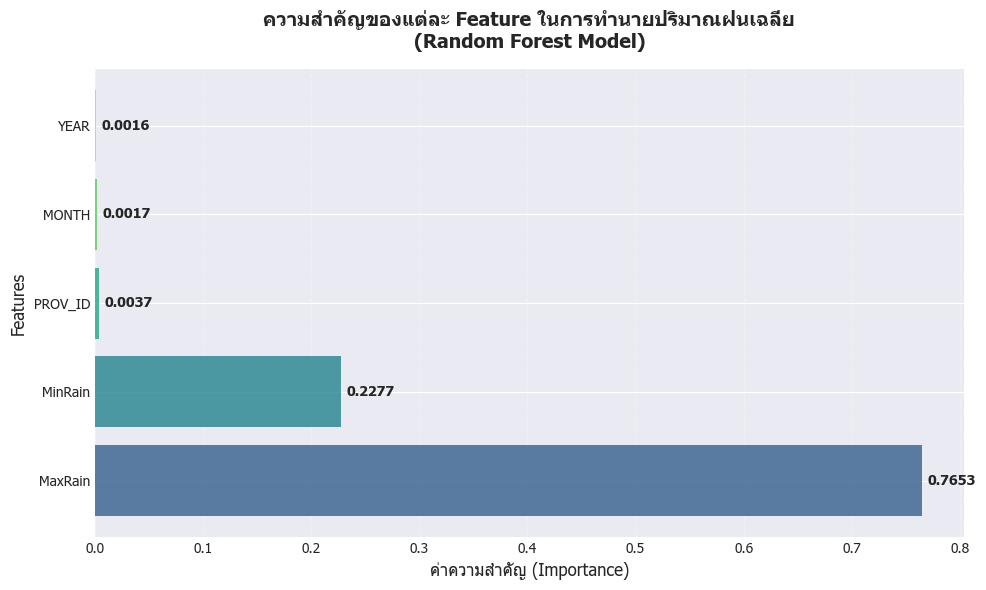


✓ Feature importance analysis completed

KEY INSIGHTS

1. Feature ที่สำคัญที่สุด: MaxRain
   → มีอิทธิพล 76.5% ต่อการทำนาย

2. ข้อมูลที่ clean แล้วมีคุณภาพ: 100.00%
   → EXCELLENT ⭐⭐⭐⭐⭐

3. โมเดลที่ดีที่สุด: Random Forest
   → R² Score = 0.9780
   → RMSE = 19.71 mm

4. ข้อมูลพร้อมใช้งานสำหรับ:
   ✓ Looker Studio Visualization
   ✓ Predictive Analytics
   ✓ Time Series Analysis
   ✓ Pattern Recognition


In [47]:
# Feature Importance จาก Random Forest (model ที่ดีที่สุด)
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("="*60)
print("FEATURE IMPORTANCE ANALYSIS (Random Forest)")
print("="*60)
print("\n", feature_importance.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(10, 6))
colors_grad = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_importance)))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors_grad, alpha=0.8)

plt.xlabel('ค่าความสำคัญ (Importance)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('ความสำคัญของแต่ละ Feature ในการทำนายปริมาณฝนเฉลี่ย\n(Random Forest Model)', 
          fontsize=14, fontweight='bold', pad=15)
plt.grid(True, alpha=0.3, axis='x', linestyle='--')

# Add value labels
for i, (feature, importance) in enumerate(zip(feature_importance['Feature'], feature_importance['Importance'])):
    plt.text(importance + 0.005, i, f'{importance:.4f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Feature importance analysis completed")

# สรุปข้อค้นพบ
print("\n" + "="*60)
print("KEY INSIGHTS")
print("="*60)
print(f"\n1. Feature ที่สำคัญที่สุด: {feature_importance.iloc[0]['Feature']}")
print(f"   → มีอิทธิพล {feature_importance.iloc[0]['Importance']*100:.1f}% ต่อการทำนาย")
print(f"\n2. ข้อมูลที่ clean แล้วมีคุณภาพ: {overall_quality:.2f}%")
print(f"   → {quality_grade}")
print(f"\n3. โมเดลที่ดีที่สุด: {best_model_name}")
print(f"   → R² Score = {results[best_model_name]['R² Score']:.4f}")
print(f"   → RMSE = {results[best_model_name]['RMSE']:.2f} mm")
print(f"\n4. ข้อมูลพร้อมใช้งานสำหรับ:")
print("   ✓ Looker Studio Visualization")
print("   ✓ Predictive Analytics")
print("   ✓ Time Series Analysis")
print("   ✓ Pattern Recognition")

## 🎯 Summary & Next Steps

### สิ่งที่ทำในกระบวนการทำความสะอาดข้อมูล:
1. ✅ โหลดข้อมูลจากไฟล์ CSV
2. ✅ ตรวจสอบโครงสร้างและสถิติของข้อมูล
3. ✅ จัดการค่าที่หายไป (Missing values)
4. ✅ ตรวจสอบและลบข้อมูลซ้ำ
5. ✅ แปลงประเภทข้อมูลให้ถูกต้อง
6. ✅ สร้างคอลัมน์ DATE สำหรับ time series analysis
7. ✅ ตรวจสอบ outliers และคุณภาพข้อมูล
8. ✅ ส่งออกข้อมูลที่สะอาดแล้ว

### ไฟล์ที่ได้:
- **Input**: `datasets/spatial-rain-hii.csv`
- **Output**: `output/spatial-rain-hii-cleaned.csv`

### คอลัมน์ในไฟล์ที่ส่งออก:
- `DATE`: วันที่ (format: YYYY-MM-DD)
- `YEAR`: ปี
- `MONTH`: เดือน (1-12)
- `PROV_ID`: รหัสจังหวัด
- `PROV_T`: ชื่อจังหวัด (ภาษาไทย)
- `MinRain`: ปริมาณฝนต่ำสุด (มม.)
- `MaxRain`: ปริมาณฝนสูงสุด (มม.)
- `AvgRain`: ปริมาณฝนเฉลี่ย (มม.)

### 📊 Next Steps สำหรับ Looker Studio:
1. Upload ไฟล์ `spatial-rain-hii-cleaned.csv` ไปยัง Google Drive
2. เชื่อมต่อ data source ใน Looker Studio
3. สร้าง visualization ต่างๆ เช่น:
   - Time series chart แสดงแนวโน้มฝนตามเวลา
   - Map visualization แสดงปริมาณฝนตามจังหวัด
   - Bar chart เปรียบเทียบฝนระหว่างจังหวัด
   - Heat map แสดงฝนตามเดือนและปี

### 💡 Tips:
- ใช้คอลัมน์ `DATE` เป็น dimension หลักสำหรับ time series
- ใช้ `PROV_T` สำหรับแสดงชื่อจังหวัดในภาษาไทย
- ใช้ `AvgRain` เป็น metric หลัก และ `MinRain`, `MaxRain` เป็น metric เสริม